- 작성자: 김명환 (Kim Myunghwan)
- 작성일: 2025년 7월 9일
- 목적: matplotlib.pyplot에서 한글 폰트가 깨지지 않도록 설정한 템플릿
- github: https://github.com/c0z0c/jupyter_hangul
- 환경: Jupyter Notebook 및 Google Colab 겸용
- 자유롭게 편집해서 사용하세요

**한글 폰트 설정 셀**

In [169]:
# 기본 라이브러리

# --- Scikit-learn: 데이터 전처리, 모델, 평가 ---
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import (
    fetch_california_housing, load_iris, make_moons, make_circles,
    load_breast_cancer, load_wine
)
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import average_precision_score

# --- 기타 라이브러리 ---
import cv2
from PIL import Image
from PIL import ImageFilter
from PIL import ImageDraw
import albumentations as A
import IPython.display
#from tqdm import tqdm
from tqdm.notebook import tqdm

# --- PyTorch: 딥러닝 관련 ---
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torch.utils.data import Subset
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import v2
from torchvision.datasets import CocoDetection
from torchvision.transforms import functional as TF
from torch.nn import CrossEntropyLoss
from torch.utils.data import Dataset
from collections import OrderedDict
from pycocotools.coco import COCO
from pycocotools import mask as coco_mask

# --- 기타 ---
import re
import os
import sys
import copy
import json
import math
import random
import yaml
import shutil
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from datetime import datetime
from datetime import timezone, timedelta
import pytz
__kst = pytz.timezone('Asia/Seoul')

# GPU 설정
__device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
__device_cpu = torch.device('cpu')

  # 재현 가능한 결과를 위해
np.random.seed(42)
torch.manual_seed(42)
if __device == 'cuda':
    torch.cuda.manual_seed_all(42)

print(f"라이브러리 로드 완료 사용장치:{__device}")

라이브러리 로드 완료 사용장치:cpu


In [170]:
from urllib.request import urlretrieve; urlretrieve("https://raw.githubusercontent.com/c0z0c/jupyter_hangul/refs/heads/beta/helper_c0z0c_dev.py", "helper_c0z0c_dev.py")
import importlib
import helper_c0z0c_dev as helper
importlib.reload(helper)

🌐 https://c0z0c.github.io/jupyter_hangul
ℹ️ NumPy 2.1.3 (v2.x+): 호환성 모드 적용됨
✅ 설정 완료: 한글 폰트, plt 전역 등록, pandas 확장, 캐시 기능
pd commit 저장 경로 = d:\GoogleDrive\codeit_ai_health_eat\scripts\김명환


<module 'helper_c0z0c_dev' from 'd:\\GoogleDrive\\codeit_ai_health_eat\\scripts\\김명환\\helper_c0z0c_dev.py'>

In [171]:
import os, sys
from pathlib import Path

utils_dir = None
if helper.is_colab:
    utils_dir = "/content/drive/MyDrive/codeit_ai_health_eat/src/python_modules/utils"
else:
    utils_dir = os.path.join(Path.cwd().drive + '\\', 'GoogleDrive', "codeit_ai_health_eat", "src", "python_modules", "utils")

print("utils_dir:", utils_dir)

sys.path.append(str(utils_dir))
print("sys.path:", sys.path)
import importlib
import health_ea_utils as heu
importlib.reload(heu)
from health_ea_utils import *

print("helper.__file__:", helper.__file__)
print("health_ea_utils.__file__:", heu.__file__)


utils_dir: d:\GoogleDrive\codeit_ai_health_eat\src\python_modules\utils
sys.path: ['c:\\Users\\sw1\\anaconda3\\envs\\env_colab_250827\\python310.zip', 'c:\\Users\\sw1\\anaconda3\\envs\\env_colab_250827\\DLLs', 'c:\\Users\\sw1\\anaconda3\\envs\\env_colab_250827\\lib', 'c:\\Users\\sw1\\anaconda3\\envs\\env_colab_250827', '', 'C:\\Users\\sw1\\AppData\\Roaming\\Python\\Python310\\site-packages', 'c:\\Users\\sw1\\anaconda3\\envs\\env_colab_250827\\lib\\site-packages', 'c:\\Users\\sw1\\anaconda3\\envs\\env_colab_250827\\lib\\site-packages\\win32', 'c:\\Users\\sw1\\anaconda3\\envs\\env_colab_250827\\lib\\site-packages\\win32\\lib', 'c:\\Users\\sw1\\anaconda3\\envs\\env_colab_250827\\lib\\site-packages\\Pythonwin', 'd:\\GoogleDrive\\codeit_ai_health_eat\\src\\python_modules\\utils', 'd:\\GoogleDrive\\codeit_ai_health_eat\\src\\python_modules\\utils', 'd:\\GoogleDrive\\codeit_ai_health_eat\\src\\python_modules\\utils', 'd:\\GoogleDrive\\codeit_ai_health_eat\\src\\python_modules\\utils', 'd:\\Go

### 2. 학습용 데이타 다운로드 및 압축 풀기

In [172]:
# google drive root에 keggle.json 파일 필요합니다.

#kaggle_code_it_data = "~/.cache/kaggle_code_it_data" if helper.is_colab else os.path.join(Path.cwd(),'dataset', 'kaggle_code_it_data')
kaggle_config_dir = "/content/drive/MyDrive/" if helper.is_colab else os.path.join(Path.cwd().drive + '\\', 'GoogleDrive')
print("kaggle_config_dir:", kaggle_config_dir)
kaggle_code_it_data = os.path.join( '~/.cache/' if helper.is_colab else Path.cwd().drive + '\\','dataset', 'kaggle_code_it_data')
print("kaggle_code_it_data:", kaggle_code_it_data)

import sys
from kaggle.api.kaggle_api_extended import KaggleApi
from tqdm import tqdm

def download_ai01_level1_project():
    os.environ['KAGGLE_CONFIG_DIR'] = kaggle_config_dir
    kaggle_path = os.path.join(kaggle_code_it_data, 'ai04-level1-project.zip')
    if not os.path.exists(kaggle_path):
        os.makedirs(kaggle_code_it_data, exist_ok=True)
        print("Kaggle 데이터 다운로드 중...")
        api = KaggleApi()
        api.authenticate()
        # 전체 압축파일 다운로드 (프로그래스 바는 kaggle API에서 지원하지 않음)
        api.competition_download_files('ai04-level1-project', path=kaggle_code_it_data)
        return os.path.join(kaggle_code_it_data, 'ai04-level1-project.zip')
        print("Kaggle 데이터 다운로드 완료")
    else:
        return kaggle_path
        print("Kaggle 데이터 다운로드 완료")
        
kaggle_path = os.path.join(kaggle_code_it_data, 'ai04-level1-project.zip')
kaggle_unzip_path = os.path.join(kaggle_code_it_data, 'ai04-level1-project.zip.unzip')
if os.path.exists(kaggle_unzip_path) is False:
    kaggle_path = download_ai01_level1_project()
    heu.unzip([kaggle_path,])
    kaggle_unzip_path = f"{kaggle_path}.unzip"
    print(f"다운로드 완료", kaggle_unzip_path)
else:
    kaggle_unzip_path = f"{kaggle_path}.unzip"
    print(f"이미 다운로드 받았습니다.", kaggle_unzip_path)

root_dir = os.path.join(kaggle_unzip_path)
kaggle_unzip_path_test_images = os.path.join(kaggle_unzip_path, 'test_images')
kaggle_unzip_path_train_images = os.path.join(kaggle_unzip_path, 'train_images')


kaggle_config_dir: d:\GoogleDrive
kaggle_code_it_data: d:\dataset\kaggle_code_it_data
이미 다운로드 받았습니다. d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip


In [173]:
heu.print_dir_tree(root=kaggle_unzip_path)

|-- test_images
   [데이터파일: 843개]
   |-- 1.png
   |-- 10.png
   |-- 100.png
   |-- 1003.png
   |-- 1004.png
   |-- 1005.png
   |-- 1006.png
   |-- 1007.png
   |-- 1009.png
   |-- 1010.png
   |-- 1012.png
   |-- 1013.png
   |-- 1014.png
   |-- 1015.png
   |-- 1016.png
   |-- 1018.png
   |-- 1019.png
   |-- 102.png
   |-- 1020.png
   |-- 1022.png
   |-- 1023.png
   |-- 1025.png
   |-- 1026.png
   |-- 1027.png
   |-- 1028.png
   |-- 1029.png
   |-- 1030.png
   |-- 1034.png
   |-- 1039.png
   |-- 104.png
   |-- 1041.png
   |-- 1043.png
   |-- 1044.png
   |-- 1045.png
   |-- 1046.png
   |-- 1047.png
   |-- 1050.png
   |-- 1051.png
   |-- 1053.png
   |-- 1055.png
   |-- 1056.png
   |-- 1057.png
   |-- 1058.png
   |-- 1060.png
   |-- 1064.png
   |-- 1065.png
   |-- 1067.png
   |-- 1069.png
   |-- 1070.png
   |-- 1073.png
   |-- 1075.png
   |-- 1076.png
   |-- 1077.png
   |-- 1079.png
   |-- 108.png
   |-- 1080.png
   |-- 1081.png
   |-- 1085.png
   |-- 1087.png
   |-- 1089.png
   |-- 109.png
 

In [174]:
def df_filename_list(root):
    """
    root 하위의 모든 .json 파일에 대해
    - 파일명(확장자 없는)
    - json 파일 경로
    - png 파일 경로 (동일 경로, 동일 파일명, 확장자만 .png)
    를 DataFrame으로 반환
    """
    import os
    import pandas as pd

    records = []
    for dirpath, _, filenames in os.walk(root):
        for fname in filenames:
            drug_info={
                'filename': None,
                'ext': None,
                'file_name': None,
                'path': None,
                'label': None,
                'drug0': None,
                'drug1': None,
                'drug2': None,
                'drug3': None,
            }
            
            filename, ext = os.path.splitext(fname)
            ext = ext.lower().replace('.', '')  # 확장자에서 . 제거
            drug_info.update({
                'filename': filename,
                'file_name': fname,
                'ext': ext,
                'path': os.path.join(dirpath, fname),
            })
            if filename.startswith('K-'):
                # 예시: K-001900-010224-016551-031705_0_2_0_2_70_000_200
                parts = filename.split('_')[0].split('-')
                if len(parts) >= 5:
                    drug_info.update({
                        'label': f'{filename.split("_")[0]}',
                        'drug0': f'K-{parts[1]}',
                        'drug1': f'K-{parts[2]}',
                        'drug2': f'K-{parts[3]}',
                        'drug3': f'K-{parts[4]}',
                    })
            records.append(drug_info)
    return pd.DataFrame(records)


In [175]:
df_test = df_filename_list(os.path.join(kaggle_unzip_path, 'test_images'))
df_train = df_filename_list(os.path.join(kaggle_unzip_path, 'train_images'))

In [176]:
df_test.describe().head_att()
df_train.describe().head_att()

        filename ext file_name                                                                             path label drug0 drug1 drug2 drug3
  count      843 843       843                                                                              843     0     0     0     0     0
 unique      843   1       843                                                                              843     0     0     0     0     0
    top      999 png   999.png d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip\test_images\999.png   nan   nan   nan   nan   nan
   freq        1 843         1                                                                                1   nan   nan   nan   nan   nan
                                                filename  ext                                            file_name                                                                                                                           path                         label    drug0    drug1 

In [177]:
df_files = df_filename_list(kaggle_unzip_path)
print(df_files.isna().sum())

filename        0
ext             0
file_name       0
path            0
label        1839
drug0        1839
drug1        1839
drug2        1839
drug3        1839
dtype: int64


In [178]:
df_files.sort_values(by='filename',inplace=True)
df_files_sort = df_files

In [179]:
df_files_sort.iloc[1000:1010].head_att(10)

                                              filename  ext                                             file_name                                                                                                                                                                             path                         label    drug0    drug1    drug2    drug3
  962 K-001900-016548-019607-031705_0_2_0_2_75_000_200 json K-001900-016548-019607-031705_0_2_0_2_75_000_200.json d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip\train_annotations\K-001900-016548-019607-031705_json\K-016548\K-001900-016548-019607-031705_0_2_0_2_75_000_200.json K-001900-016548-019607-031705 K-001900 K-016548 K-019607 K-031705
 5406 K-001900-016548-019607-031705_0_2_0_2_75_000_200  png  K-001900-016548-019607-031705_0_2_0_2_75_000_200.png                                                   d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip\train_images\K-001900-016548-019607-031705_0_2_0_2_75_000_200

### 3. Json to DataFrame

### 4. Yolo DataFrame

In [180]:
# json 파일을 DataFrame로 로드
df = df_files.copy()
def json_to_df(json_path):
    """
    json_path의 json 파일을 pandas DataFrame으로 변환
    - images, annotations, categories를 각각 DataFrame으로 반환
    """
    with open(json_path, encoding='utf-8') as f:
        data = json.load(f)

    df_images = pd.DataFrame(data.get('images', []))
    df_annotations = pd.DataFrame(data.get('annotations', []))
    df_categories = pd.DataFrame(data.get('categories', []))

    return df_images, df_annotations, df_categories

def bbox_to_yolo(bbox, img_width, img_height):
    # bbox: [x, y, w, h] (COCO)
    if not bbox or len(bbox) < 4:
        return None  # 오류시 None 반환

    x, y, w, h = bbox[:4]
    x_center = (x + w / 2) / img_width
    y_center = (y + h / 2) / img_height
    w_norm = w / img_width
    h_norm = h / img_height
    return x_center, y_center, w_norm, h_norm

def collect_json_info(df):
    """
                                              filename  ext                                             file_name                                                                                                                                                                             path                         label  drug0  drug1  drug2  drug3
  962 K-001900-016548-019607-031705_0_2_0_2_75_000_200 json K-001900-016548-019607-031705_0_2_0_2_75_000_200.json d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip\train_annotations\K-001900-016548-019607-031705_json\K-016548\K-001900-016548-019607-031705_0_2_0_2_75_000_200.json K-001900-016548-019607-031705 001900 016548 019607 031705
 5406 K-001900-016548-019607-031705_0_2_0_2_75_000_200  png  K-001900-016548-019607-031705_0_2_0_2_75_000_200.png                                                   d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip\train_images\K-001900-016548-019607-031705_0_2_0_2_75_000_200.png K-001900-016548-019607-031705 001900 016548 019607 031705
    
    df['ext'] json을 순회하며 json_to_df로 정보를 읽고,
    df에 image, drug_N, width, height, bbox_x/y/w/h, yolo_x/y/w/h 컬럼을 추가.
    약 정보는 drug_N 기준으로 중복 없이 df_drug에 저장.
    bbox 오류가 있는 파일은 출력하고 제거.    
    """
    import pandas as pd

    records = []
    drug_info = {}
    error_files = []  # 오류 파일 목록
    
    # Test 분류
    df_test = df[(df['ext'] == 'png') & (df['path'].str.contains('test', case=False))].copy()
    pbar = tqdm(df_test.iterrows(), total=len(df_test), mininterval=3, desc="Processing Test files")
    for idx, row in pbar:
        field = {
                **row,
                'imgfile': row['path'],
                'Train' : False,
                'Test' : True,
                'drug_N': None,
                'width': 0,
                'height': 0,
                'bbox_x': 0,
                'bbox_y': 0,
                'bbox_w': 0,
                'bbox_h': 0,
                'yolo_x': 0.0,
                'yolo_y': 0.0,
                'yolo_w': 0.0,
                'yolo_h': 0.0
            }
        records.append(field)
    
    # Train 분류
    df_json = df[df['ext'] == 'json'].copy()
    df_png = df[df['ext'] == 'png'].copy()
    pbar = tqdm(df_json.iterrows(), total=len(df_json), mininterval=3, desc="Processing JSON files")
    for idx, row in pbar:
        field = {
                **row,
                'imgfile': None,
                'Train' : True,
                'Test' : False,
                'drug_N': None,
                'width': 0,
                'height': 0,
                'bbox_x': 0,
                'bbox_y': 0,
                'bbox_w': 0,
                'bbox_h': 0,
                'yolo_x': 0.0,
                'yolo_y': 0.0,
                'yolo_w': 0.0,
                'yolo_h': 0.0
            }
        filename = row['filename']
        json_path = row['path']

        try:
            df_images, df_annotations, df_categories = json_to_df(json_path)
        except Exception as e:
            print(f"JSON 파싱 오류 - 파일: {filename}, 오류: {e}")
            error_files.append(filename)
            continue

        if df_images.empty or df_annotations.empty:
            print(f"데이터 부족 - 파일: {filename} (images: {len(df_images)}, annotations: {len(df_annotations)})")
            error_files.append(filename)
            continue

        img_row = df_images.iloc[0]
        ann_row = df_annotations.iloc[0]
        cat_row = df_categories.iloc[0] if not df_categories.empty else {}
        
        png_match = df_png[df_png['file_name'] == img_row.get('file_name', None)]
        if png_match.empty:
            pbar.set_postfix_str(f"이미지 파일 없음 - 파일: {filename}")
            error_files.append(filename)
            continue

        field['imgfile'] = png_match['path'].values[0]  # path가 여러 개면 첫 번째 값 사용
        
        if pd.isna(field['imgfile']) | (field['imgfile'] is None):
            pbar.set_postfix_str(f"이미지 파일명 누락 - 파일: {filename}")
            error_files.append(filename)
            continue

        # bbox 검증
        bbox = ann_row.get('bbox', [])
        if not bbox or len(bbox) < 4:
            print(f"bbox 오류 - 파일: {filename}, bbox: {bbox}")
            error_files.append(filename)
            continue

        # YOLO bbox 계산
        yolo_result = bbox_to_yolo(bbox, img_row['width'], img_row['height'])
        if yolo_result is None:
            print(f"YOLO 변환 오류 - 파일: {filename}")
            error_files.append(filename)
            continue

        x_center, y_center, w_norm, h_norm = yolo_result

        # 기존 df row에 정보 추가
        field.update({
            'drug_N': img_row.get('drug_N'),
            'width': img_row.get('width'),
            'height': img_row.get('height'),
            'bbox_x': bbox[0],
            'bbox_y': bbox[1],
            'bbox_w': bbox[2],
            'bbox_h': bbox[3],
            'yolo_x': x_center,
            'yolo_y': y_center,
            'yolo_w': w_norm,
            'yolo_h': h_norm
        })
        records.append(field)

        # 약 정보 dict (중복 제거)
        drug_N = img_row.get('drug_N')
        if drug_N and drug_N not in drug_info:
            drug_info[drug_N] = {
                'drug_N': drug_N,
                'drug_S': img_row.get('drug_S'),
                'dl_name': img_row.get('dl_name'),
                'dl_name_en': img_row.get('dl_name_en'),
                'img_key': img_row.get('img_key'),
                'dl_material': img_row.get('dl_material'),
                'dl_material_en': img_row.get('dl_material_en'),
                'dl_custom_shape': img_row.get('dl_custom_shape'),
                'dl_company': img_row.get('dl_company'),
                'dl_company_en': img_row.get('dl_company_en'),
                'di_class_no': img_row.get('di_class_no'),
                'di_etc_otc_code': img_row.get('di_etc_otc_code'),
                'di_edi_code': img_row.get('di_edi_code'),
                'chart': img_row.get('chart'),
                'drug_shape': img_row.get('drug_shape'),
                'form_code_name': img_row.get('form_code_name'),
                'supercategory': cat_row.get('supercategory', ''),
                'name': cat_row.get('name', '')
            }
        if idx % 100 == 0:
            pbar.set_postfix_str(filename)

    print(f"\n=== 처리 결과 ===")
    print(f"전체 파일: {len(df)}")
    print(f"성공 처리: {len(records)}")
    print(f"오류 파일: {len(error_files)}")
    if error_files:
        print(f"오류 파일 목록 (처음 10개): {error_files[:10]}")

    df_new = pd.DataFrame(records)
    df_drug = pd.DataFrame(list(drug_info.values()))
    
    train_df = df_new[df_new['Train'] == True]
    drug_classes = {drug_N: idx+1 for idx, drug_N in enumerate(sorted(train_df['drug_N'].unique()))}
    
    df_new['class_id'] = train_df['drug_N'].map(drug_classes).fillna(0).astype(int)
    df_drug['class_id'] = df_drug['drug_N'].map(drug_classes).fillna(0).astype(int)

    # df_drug = pd.DataFrame(list(drug_info.values()))
    # drug_classes = {drug_N: idx+1 for idx, drug_N in enumerate(sorted(df_new['drug_N'].unique()))}
    # df_new['class_id'] = df_new['drug_N'].map(drug_classes).fillna(0).astype(int)
    # df_drug['class_id'] = df_drug['drug_N'].map(drug_classes).fillna(0).astype(int)
    
    return df_new, df_drug, drug_classes

# os.path.join(kaggle_unzip_path, 'train_images')
def create_yolo_dataset(df_files, ignore=True):
    df = helper.pd_checkout("df_codeit04_new", commit_dir=drive_root())
    df_drug = helper.pd_checkout("df_codeit04_drug", commit_dir=drive_root())
    if df.empty or df_drug.empty or ignore:
        from datetime import datetime
        print("JSON 정보 수집 중...")
        # 실행
        df, df_drug, _ = collect_json_info(df_files)
        print('df_new shape:', df.shape)
        print('df_drug shape:', df_drug.shape)

        helper.pd_commit(df, "df_codeit04_new", commit_dir=drive_root())
        helper.pd_commit(df_drug, "df_codeit04_drug", commit_dir=drive_root())

        print("df_codeit04_new, df_codeit04_drug 저장")
    else:
        print("이미 df_codeit04_new, df_codeit04_drug가 존재함")
    
    df.sort_values(by='filename',inplace=True)
    df_drug.sort_values(by='drug_N',inplace=True)
    return df, df_drug

df_train_test, df_drug = create_yolo_dataset(df_files = df_files, ignore=True)
drug_classes = dict(zip(df_drug['drug_N'], df_drug['class_id']))
drug_classes_idx = dict(zip(df_drug['class_id'], df_drug['drug_N']))

print('-' * 80)
print("Train 개수:", df_train_test['Train'].sum())
print("Test 개수:", len(df_train_test) - df_train_test['Train'].sum())
print("Drug 종류 개수:", df_train_test['drug_N'].nunique())
print("Drug 종류 분포:")
print(df_train_test['drug_N'].value_counts())
print('-' * 80)
df_drug.describe().head_att(10)
df_drug.head_att(2)
print('-' * 80)
df_train_test.describe().head_att(10)
df_train_test.iloc[2000:2002].head_att(2)



JSON 정보 수집 중...


Processing JSON files: 100%|██████████| 4526/4526 [01:26<00:00, 52.58it/s, K-003544-010221-016551-021026_0_2_0_2_90_000_200]



=== 처리 결과 ===
전체 파일: 6858
성공 처리: 5369
오류 파일: 0
df_new shape: (5369, 24)
df_drug shape: (73, 19)
✅ 커밋 완료: bc13220ed018 | 2025-09-11 15:15:15 | df_codeit04_new
✅ 커밋 완료: 0d4f63057d80 | 2025-09-11 15:15:15 | df_codeit04_drug
df_codeit04_new, df_codeit04_drug 저장
--------------------------------------------------------------------------------
Train 개수: 4526
Test 개수: 843
Drug 종류 개수: 73
Drug 종류 분포:
drug_N
K-003483    514
K-003351    240
K-001900    180
K-002483    172
K-016548    143
           ... 
K-027993     11
K-023203     10
K-012420      9
K-029871      9
K-033878      7
Name: count, Length: 73, dtype: int64
--------------------------------------------------------------------------------
       class_id
 count       73
  mean       37
   std  21.2171
   min        1
   25%       19
   50%       37
   75%       55
   max       73
      drug_N   drug_S          dl_name              dl_name_en                                              img_key    dl_material          dl_material_en dl_c

## 전처리 bbox 맞지 않는 부분 처리

In [241]:
def visualize_drug_labels(df_train_test, df_drug, labels, figsize=(10, 5)):
    """
    df_train_test의 label 값을 입력하면 해당 label의 이미지 및 bbox를 시각화
    bbox 위에는 약품코드 및 약품명도 표시
    
    Args:
        df_train_test: 훈련/테스트 데이터프레임
        df_drug: 약품 정보 데이터프레임
        labels: 시각화할 label 값 (str 또는 list)
        figsize: 그림 크기
    """
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches
    import cv2
    
    # labels가 문자열이면 리스트로 변환
    if isinstance(labels, str):
        labels = [labels]
    
    # 각 label에 대해 독립된 plot 생성
    n_labels = len(labels)
    fig, axes = plt.subplots(1, n_labels, figsize=figsize)
    
    # axes가 단일 객체인 경우 리스트로 변환
    if n_labels == 1:
        axes = [axes]
    
    for idx, label in enumerate(labels):
        ax = axes[idx]
        
        # 해당 label의 데이터 필터링
        label_data = df_train_test[df_train_test['label'] == label]
        
        if label_data.empty:
            ax.text(0.5, 0.5, f'Label "{label}"\n데이터 없음', 
                   ha='center', va='center', transform=ax.transAxes,
                   fontsize=14, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral"))
            ax.set_title(f'Label: {label}')
            ax.axis('off')
            continue
        
        # 첫 번째 이미지 선택
        sample_row = label_data.iloc[0]
        img_path = sample_row['imgfile']
        
        try:
            # 이미지 로드
            img = cv2.imread(img_path)
            if img is None:
                ax.text(0.5, 0.5, f'Label "{label}"\n이미지 로드 실패', 
                       ha='center', va='center', transform=ax.transAxes,
                       fontsize=14, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral"))
                ax.set_title(f'Label: {label}')
                ax.axis('off')
                continue
                
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            ax.imshow(img_rgb)
            
            # 같은 이미지의 모든 bbox 그리기
            same_image_data = label_data[label_data['imgfile'] == img_path]
            
            colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta']
            
            for i, (_, row) in enumerate(same_image_data.iterrows()):
                # bbox 좌표
                x, y, w, h = row['bbox_x'], row['bbox_y'], row['bbox_w'], row['bbox_h']
                drug_n = row['drug_N']
                
                # 약품 정보 가져오기
                drug_info = df_drug[df_drug['drug_N'] == drug_n]
                drug_name = drug_info['dl_name'].iloc[0] if not drug_info.empty and not pd.isna(drug_info['dl_name'].iloc[0]) else drug_n
                
                # bbox 색상
                color = colors[i % len(colors)]
                
                # bbox 그리기
                rect = patches.Rectangle((x, y), w, h, linewidth=3, 
                                       edgecolor=color, facecolor='none')
                ax.add_patch(rect)
                
                # 약품코드 및 약품명 텍스트
                text = f'{drug_n}\n{drug_name}'
                
                # 텍스트 배경 박스
                bbox_props = dict(boxstyle="round,pad=0.3", facecolor=color, alpha=0.7)
                
                # 텍스트 위치 (bbox 위쪽)
                text_x = x + w/2
                text_y = max(0, y - 10)
                
                ax.text(text_x, text_y, text, fontsize=10, ha='center', va='bottom',
                       color='white', weight='bold', bbox=bbox_props)
            
            # 제목 및 정보
            img_info = f'크기: {img.shape[1]}x{img.shape[0]}\n객체 수: {len(same_image_data)}'
            ax.set_title(f'Label: {label}\n{img_info}', fontsize=12)
            ax.axis('off')
            
        except Exception as e:
            ax.text(0.5, 0.5, f'Label "{label}"\n오류: {str(e)}', 
                   ha='center', va='center', transform=ax.transAxes,
                   fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral"))
            ax.set_title(f'Label: {label}')
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

def visualize_drug_samples(df_train_test, df_drug, drug_n=None, n_samples=3, figsize=(10, 5)):
    """
    특정 약품코드(drug_N)의 샘플들을 시각화
    
    Args:
        df_train_test: 훈련/테스트 데이터프레임
        df_drug: 약품 정보 데이터프레임
        drug_n: 약품코드 (None이면 랜덤 선택)
        n_samples: 표시할 샘플 수
        figsize: 그림 크기
    """
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches
    import cv2
    
    # drug_n이 None이면 랜덤하게 선택
    if drug_n is None:
        available_drugs = df_train_test['drug_N'].dropna().unique()
        drug_n = np.random.choice(available_drugs)
    
    # 해당 약품의 데이터 필터링
    drug_data = df_train_test[df_train_test['drug_N'] == drug_n]
    
    if drug_data.empty:
        print(f"약품코드 '{drug_n}'에 대한 데이터가 없습니다.")
        return
    
    # 약품 정보
    drug_info = df_drug[df_drug['drug_N'] == drug_n]
    drug_name = drug_info['dl_name'].iloc[0] if not drug_info.empty and not pd.isna(drug_info['dl_name'].iloc[0]) else drug_n
    
    # 샘플 선택 (최대 n_samples개)
    samples = drug_data.head(n_samples)
    n_actual = len(samples)
    
    fig, axes = plt.subplots(1, n_actual, figsize=figsize)
    if n_actual == 1:
        axes = [axes]
    
    for i, (_, row) in enumerate(samples.iterrows()):
        ax = axes[i]
        img_path = row['imgfile']
        
        try:
            # 이미지 로드
            img = cv2.imread(img_path)
            if img is None:
                ax.text(0.5, 0.5, '이미지 로드 실패', ha='center', va='center', 
                       transform=ax.transAxes, fontsize=12)
                ax.set_title(f'샘플 {i+1}')
                ax.axis('off')
                continue
            
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            ax.imshow(img_rgb)
            
            # bbox 그리기
            x, y, w, h = row['bbox_x'], row['bbox_y'], row['bbox_w'], row['bbox_h']
            rect = patches.Rectangle((x, y), w, h, linewidth=3, 
                                   edgecolor='red', facecolor='none')
            ax.add_patch(rect)
            
            # 샘플 정보
            sample_info = f'Set: {row["set_type"]}\nClass ID: {row["class_id"]}'
            ax.set_title(f'샘플 {i+1}\n{sample_info}', fontsize=10)
            ax.axis('off')
            
        except Exception as e:
            ax.text(0.5, 0.5, f'오류: {str(e)}', ha='center', va='center', 
                   transform=ax.transAxes, fontsize=10)
            ax.set_title(f'샘플 {i+1}')
            ax.axis('off')
    
    plt.suptitle(f'약품: {drug_n} - {drug_name}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()


=== 시각화 함수 사용 예시 ===
1. 단일 label 시각화:
   visualize_drug_labels(df_train_test, df_drug, 'K-002483-005094-013395-019552')


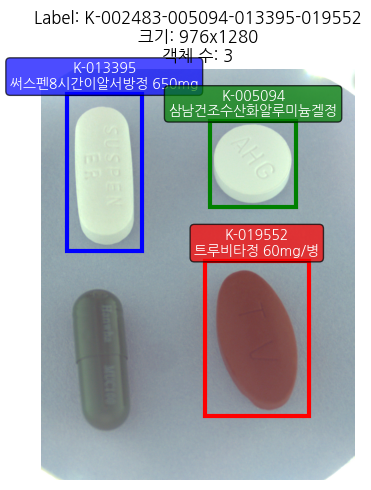

In [242]:
# 사용 예시
print("=== 시각화 함수 사용 예시 ===")

# 1. 단일 label 시각화
print("1. 단일 label 시각화:")
sample_label = 'K-002483-005094-013395-019552'
print(f"   visualize_drug_labels(df_train_test, df_drug, '{sample_label}')")
visualize_drug_labels(df_train_test, df_drug, sample_label)


2. 여러 label 시각화:
   visualize_drug_labels(df_train_test, df_drug, ['K-001900-010224-016551-031705', 'K-001900-010224-016551-033009', 'K-001900-016548-018110-021026'])


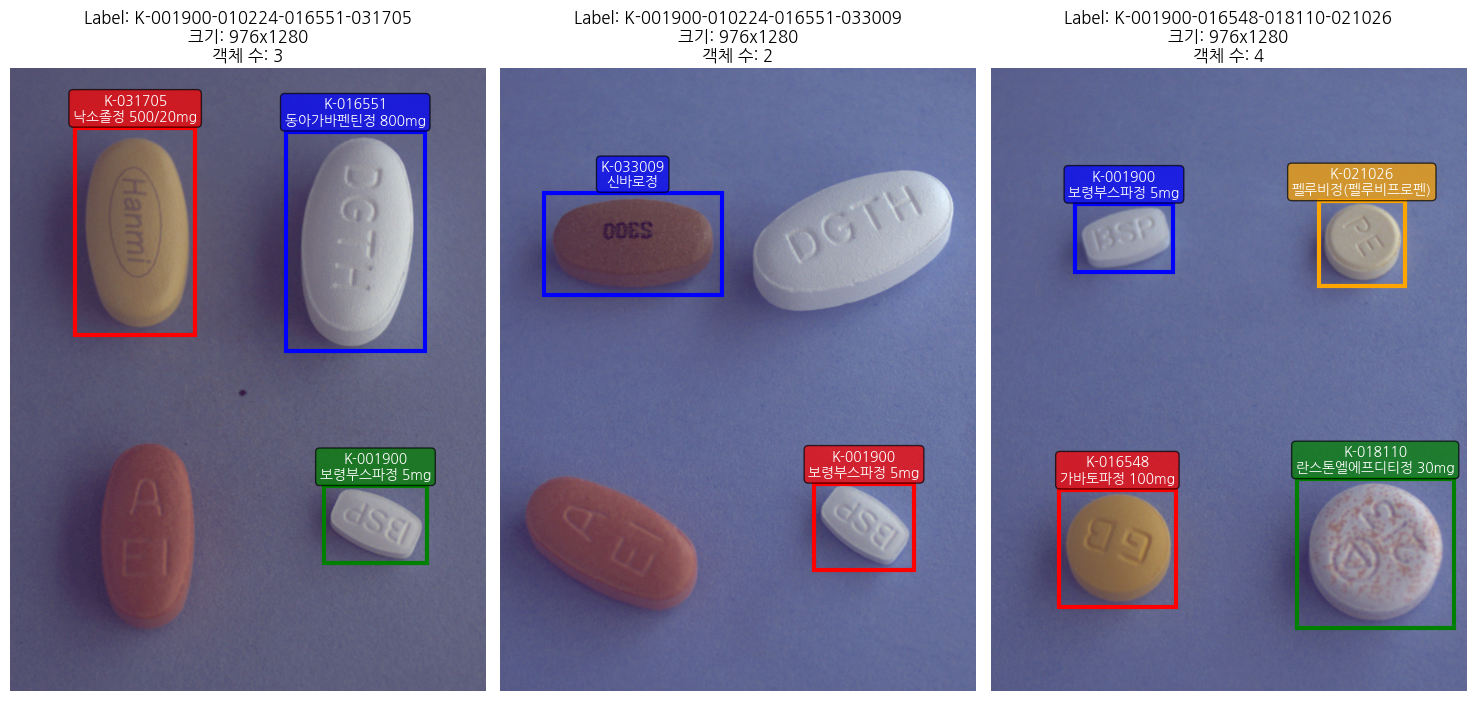

In [228]:
# 2. 여러 label 시각화 
print("\n2. 여러 label 시각화:")
sample_labels = df_train_test['label'].dropna().unique()[:3].tolist()
print(f"   visualize_drug_labels(df_train_test, df_drug, {sample_labels})")
visualize_drug_labels(df_train_test, df_drug, sample_labels)



3. 특정 약품의 여러 샘플 시각화:
   visualize_drug_samples(df_train_test, df_drug, 'K-031705', n_samples=3)


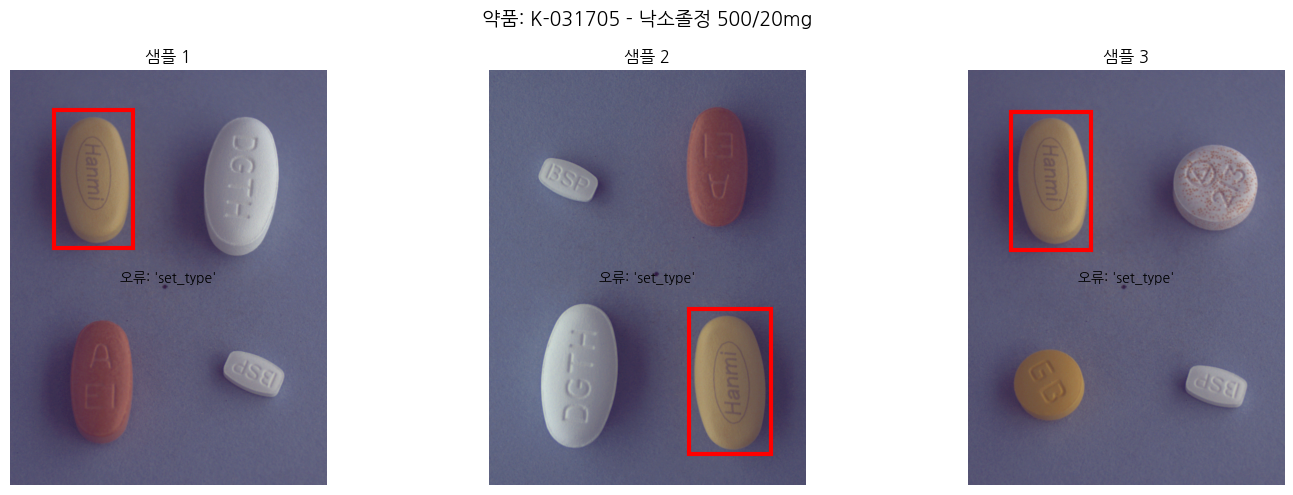

In [229]:

# 3. 특정 약품의 여러 샘플 시각화
print("\n3. 특정 약품의 여러 샘플 시각화:")
sample_drug = df_train_test['drug_N'].dropna().iloc[0]
print(f"   visualize_drug_samples(df_train_test, df_drug, '{sample_drug}', n_samples=3)")
visualize_drug_samples(df_train_test, df_drug, sample_drug, n_samples=3)

In [230]:
def update_bbox_by_label_and_drug(df_train_test, label, drug_code, new_bbox_x, new_bbox_y, new_bbox_w, new_bbox_h, img_width=976, img_height=1280):
    """
    df_train_test의 특정 label과 약품코드에 해당하는 데이터의 bbox 및 yolo bbox를 수정
    
    Args:
        df_train_test: 훈련/테스트 데이터프레임
        label: 라벨 값 (예: 'K-001900-016548-018110-027926')
        drug_code: 약품코드 (예: 'K-001900')
        new_bbox_x: 새로운 bbox x 좌표
        new_bbox_y: 새로운 bbox y 좌표  
        new_bbox_w: 새로운 bbox 너비
        new_bbox_h: 새로운 bbox 높이
        img_width: 이미지 너비 (YOLO 변환용)
        img_height: 이미지 높이 (YOLO 변환용)
    
    Returns:
        updated_count: 업데이트된 행의 수
        updated_indices: 업데이트된 행의 인덱스 리스트
    """
    # 조건에 맞는 데이터 찾기
    condition = (df_train_test['label'] == label) & (df_train_test['drug_N'] == drug_code)
    matching_indices = df_train_test[condition].index.tolist()
    
    if len(matching_indices) == 0:
        print(f"조건에 맞는 데이터가 없습니다: label='{label}', drug_code='{drug_code}'")
        return 0, []
    
    # YOLO 형식으로 변환
    x_center = (new_bbox_x + new_bbox_w / 2) / img_width
    y_center = (new_bbox_y + new_bbox_h / 2) / img_height
    w_norm = new_bbox_w / img_width
    h_norm = new_bbox_h / img_height
    
    # 기존 값 출력 (첫 번째 매칭 데이터)
    if len(matching_indices) > 0:
        first_idx = matching_indices[0]
        print(f"=== 수정 전 값 (인덱스 {first_idx}) ===")
        print(f"bbox: ({df_train_test.loc[first_idx, 'bbox_x']}, {df_train_test.loc[first_idx, 'bbox_y']}, "
              f"{df_train_test.loc[first_idx, 'bbox_w']}, {df_train_test.loc[first_idx, 'bbox_h']})")
        print(f"yolo: ({df_train_test.loc[first_idx, 'yolo_x']:.6f}, {df_train_test.loc[first_idx, 'yolo_y']:.6f}, "
              f"{df_train_test.loc[first_idx, 'yolo_w']:.6f}, {df_train_test.loc[first_idx, 'yolo_h']:.6f})")
    
    # 값 업데이트
    df_train_test.loc[condition, 'bbox_x'] = new_bbox_x
    df_train_test.loc[condition, 'bbox_y'] = new_bbox_y
    df_train_test.loc[condition, 'bbox_w'] = new_bbox_w
    df_train_test.loc[condition, 'bbox_h'] = new_bbox_h
    df_train_test.loc[condition, 'yolo_x'] = x_center
    df_train_test.loc[condition, 'yolo_y'] = y_center
    df_train_test.loc[condition, 'yolo_w'] = w_norm
    df_train_test.loc[condition, 'yolo_h'] = h_norm
    
    print(f"=== 수정 후 값 ===")
    print(f"bbox: ({new_bbox_x}, {new_bbox_y}, {new_bbox_w}, {new_bbox_h})")
    print(f"yolo: ({x_center:.6f}, {y_center:.6f}, {w_norm:.6f}, {h_norm:.6f})")
    print(f"업데이트된 행 수: {len(matching_indices)}")
    print(f"업데이트된 인덱스: {matching_indices}")
    
    return len(matching_indices), matching_indices

def update_bbox_interactive(df_train_test, df_drug):
    """
    대화형으로 bbox를 수정하는 함수
    
    Args:
        df_train_test: 훈련/테스트 데이터프레임
        df_drug: 약품 정보 데이터프레임
    """
    # 사용 가능한 label 목록 표시
    available_labels = df_train_test['label'].dropna().unique()
    print(f"사용 가능한 label 수: {len(available_labels)}")
    print("처음 10개 label:")
    for i, label in enumerate(available_labels[:10]):
        print(f"  {i+1}. {label}")
    
    # label 입력
    label = input("\n수정할 label을 입력하세요: ").strip()
    if label not in available_labels:
        print("존재하지 않는 label입니다.")
        return
    
    # 해당 label의 약품코드 목록 표시
    label_data = df_train_test[df_train_test['label'] == label]
    available_drugs = label_data['drug_N'].dropna().unique()
    print(f"\n'{label}'에서 사용 가능한 약품코드:")
    for i, drug in enumerate(available_drugs):
        drug_info = df_drug[df_drug['drug_N'] == drug]
        drug_name = drug_info['dl_name'].iloc[0] if not drug_info.empty else "이름 없음"
        print(f"  {i+1}. {drug} - {drug_name}")
    
    # 약품코드 입력
    drug_code = input("\n수정할 약품코드를 입력하세요: ").strip()
    if drug_code not in available_drugs:
        print("해당 label에 존재하지 않는 약품코드입니다.")
        return
    
    # 현재 bbox 값 표시
    current_data = df_train_test[(df_train_test['label'] == label) & 
                                (df_train_test['drug_N'] == drug_code)].iloc[0]
    print(f"\n현재 bbox 값:")
    print(f"  x: {current_data['bbox_x']}")
    print(f"  y: {current_data['bbox_y']}")
    print(f"  w: {current_data['bbox_w']}")
    print(f"  h: {current_data['bbox_h']}")
    print(f"  이미지 크기: {current_data['width']} x {current_data['height']}")
    
    # 새로운 bbox 값 입력
    try:
        new_x = float(input(f"새로운 x 좌표 (현재: {current_data['bbox_x']}): ") or current_data['bbox_x'])
        new_y = float(input(f"새로운 y 좌표 (현재: {current_data['bbox_y']}): ") or current_data['bbox_y'])
        new_w = float(input(f"새로운 너비 (현재: {current_data['bbox_w']}): ") or current_data['bbox_w'])
        new_h = float(input(f"새로운 높이 (현재: {current_data['bbox_h']}): ") or current_data['bbox_h'])
        
        # 업데이트 실행
        updated_count, updated_indices = update_bbox_by_label_and_drug(
            df_train_test, label, drug_code, new_x, new_y, new_w, new_h,
            current_data['width'], current_data['height']
        )
        
        print(f"\n✅ 성공적으로 {updated_count}개 행이 업데이트되었습니다!")
        
    except ValueError as e:
        print(f"❌ 입력 오류: {e}")
    except Exception as e:
        print(f"❌ 업데이트 오류: {e}")

def visualize_bbox_update(df_train_test, df_drug, label, drug_code, before_after="both"):
    """
    bbox 수정 전후를 시각화하는 함수
    
    Args:
        df_train_test: 데이터프레임
        df_drug: 약품 정보 데이터프레임
        label: 라벨 값
        drug_code: 약품코드
        before_after: "before", "after", "both" 중 선택
    """
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches
    import cv2
    
    # 해당 데이터 찾기
    condition = (df_train_test['label'] == label) & (df_train_test['drug_N'] == drug_code)
    target_data = df_train_test[condition]
    
    if target_data.empty:
        print("조건에 맞는 데이터가 없습니다.")
        return
    
    sample_row = target_data.iloc[0]
    img_path = sample_row['imgfile']
    
    try:
        # 이미지 로드
        img = cv2.imread(img_path)
        if img is None:
            print("이미지 로드 실패")
            return
            
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # 약품 정보
        drug_info = df_drug[df_drug['drug_N'] == drug_code]
        drug_name = drug_info['dl_name'].iloc[0] if not drug_info.empty else drug_code
        
        # 현재 bbox 표시
        fig, ax = plt.subplots(1, 1, figsize=(12, 8))
        ax.imshow(img_rgb)
        
        x, y, w, h = sample_row['bbox_x'], sample_row['bbox_y'], sample_row['bbox_w'], sample_row['bbox_h']
        
        # bbox 그리기
        rect = patches.Rectangle((x, y), w, h, linewidth=3, 
                               edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        
        # 텍스트 표시
        text = f'{drug_code}\n{drug_name}\nBBox: ({x:.0f}, {y:.0f}, {w:.0f}, {h:.0f})'
        bbox_props = dict(boxstyle="round,pad=0.3", facecolor='red', alpha=0.7)
        
        text_x = x + w/2
        text_y = max(0, y - 10)
        
        ax.text(text_x, text_y, text, fontsize=10, ha='center', va='bottom',
               color='white', weight='bold', bbox=bbox_props)
        
        ax.set_title(f'Label: {label}\n약품: {drug_code} - {drug_name}', fontsize=12)
        ax.axis('off')
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"시각화 오류: {e}")

# 사용 예시
print("=== bbox 수정 함수 사용 예시 ===")
print("1. 직접 수정:")
print("   updated_count, indices = update_bbox_by_label_and_drug(")
print("       df_train_test, 'K-001900-016548-018110-027926', 'K-001900',")
print("       100, 200, 150, 100)")
print()
print("2. 대화형 수정:")
print("   update_bbox_interactive(df_train_test, df_drug)")
print()
print("3. 시각화:")
print("   visualize_bbox_update(df_train_test, df_drug, 'label', 'drug_code')")

# 실제 사용 예시 (주석 해제하여 사용)
# update_bbox_interactive(df_train_test, df_drug)

=== bbox 수정 함수 사용 예시 ===
1. 직접 수정:
   updated_count, indices = update_bbox_by_label_and_drug(
       df_train_test, 'K-001900-016548-018110-027926', 'K-001900',
       100, 200, 150, 100)

2. 대화형 수정:
   update_bbox_interactive(df_train_test, df_drug)

3. 시각화:
   visualize_bbox_update(df_train_test, df_drug, 'label', 'drug_code')


In [237]:
#visualize_bbox_update(df_train_test, df_drug, 'K-001900-016548-018110-027926', 'K-001900', before_after="both")

In [232]:
# updated_count, indices = update_bbox_by_label_and_drug(
#        df_train_test, 'K-001900-016548-018110-027926', 'K-001900',
#        100, 200, 150, 100)
# visualize_bbox_update(df_train_test, df_drug, 'K-001900-016548-018110-027926', 'K-001900', before_after="both")

In [233]:
# updated_count, indices = update_bbox_by_label_and_drug(
#     df_train_test, 'K-001900-016548-018110-027926', 'K-001900',
#     630, 894, 211, 133)
# visualize_bbox_update(df_train_test, df_drug, 'K-001900-016548-018110-027926', 'K-001900', before_after="both")

In [181]:
# df를 class_id의 개수 별로 정렬하고 
# Train = False이고 Test = False 이면 Validation 로 하자
# Test = True 이면 Test 로 하자
# Validation을 Train에서 램덤하게 0.3 정도 Train=False 로 하자
df = df_train_test.copy()

# 1. class_id별로 정렬
df.sort_values('class_id', inplace=True)

# 2. Validation 셋 지정 (Train=True & Test=False 중에서 class별로 30% 랜덤 선택)
for class_id in df['class_id'].unique():
    idxs = df[(df['class_id'] == class_id) & (df['Train'] == True) & (df['Test'] == False)].index
    n_val = max(1, int(len(idxs) * 0.3)) if len(idxs) > 0 else 0
    if n_val > 0:
        val_idxs = np.random.choice(idxs, n_val, replace=False)
        df.loc[val_idxs, 'Train'] = False  # Validation으로 변경

# 3. set_type 컬럼 지정
df['set_type'] = np.where(df['Test'] == True, 'Test',
                  np.where(df['Train'] == True, 'Train', 'Validation'))

df_train_val_test = df.copy()


In [182]:
df_train_val_test.columns

Index(['filename', 'ext', 'file_name', 'path', 'label', 'drug0', 'drug1',
       'drug2', 'drug3', 'imgfile', 'Train', 'Test', 'drug_N', 'width',
       'height', 'bbox_x', 'bbox_y', 'bbox_w', 'bbox_h', 'yolo_x', 'yolo_y',
       'yolo_w', 'yolo_h', 'class_id', 'set_type'],
      dtype='object')

In [183]:
# df_train_val_test의 label 관련 컬럼들의 고유 개수 확인
print("=== df_train_val_test Label 컬럼들의 고유 개수 ===")
print(f"전체 데이터 개수: {len(df_train_val_test)}")
print()

# 각 label 관련 컬럼의 고유값 개수
label_columns = ['filename', 'ext', 'file_name', 'path', 'label', 'drug0', 'drug1',
       'drug2', 'drug3', 'imgfile', 'Train', 'Test', 'drug_N', 'width',
       'height', 'bbox_x', 'bbox_y', 'bbox_w', 'bbox_h', 'yolo_x', 'yolo_y',
       'yolo_w', 'yolo_h', 'class_id', 'set_type']
for col in label_columns:
    if col in df_train_val_test.columns:
        unique_count = df_train_val_test[col].nunique()
        print(f"{col}: {unique_count}개")

print()
print("=== 세부 정보 ===")
# 각 컬럼별 상위 5개 값과 개수
for col in label_columns:
    if col in df_train_val_test.columns:
        print(f"\n{col} 상위 5개:")
        print(df_train_val_test[col].value_counts().head())

print()
print("=== set_type별 drug_N 개수 ===")
print(df_train_val_test.groupby('set_type')['drug_N'].nunique())

print()
print("=== class_id 정보 ===")
print(f"class_id 고유 개수: {df_train_val_test['class_id'].nunique()}")
print(f"class_id 범위: {df_train_val_test['class_id'].min()} ~ {df_train_val_test['class_id'].max()}")

=== df_train_val_test Label 컬럼들의 고유 개수 ===
전체 데이터 개수: 5369

filename: 2332개
ext: 2개
file_name: 2332개
path: 5369개
label: 399개
drug0: 4개
drug1: 28개
drug2: 40개
drug3: 38개
imgfile: 2332개
Train: 2개
Test: 2개
drug_N: 73개
width: 2개
height: 2개
bbox_x: 544개
bbox_y: 674개
bbox_w: 349개
bbox_h: 425개
yolo_x: 772개
yolo_y: 865개
yolo_w: 349개
yolo_h: 425개
class_id: 73개
set_type: 3개

=== 세부 정보 ===

filename 상위 5개:
filename
K-003544-012247-016548-027926_0_2_0_2_70_000_200    4
K-003544-004543-012247-016551_0_2_0_2_90_000_200    4
K-003544-004543-010221-016551_0_2_0_2_90_000_200    4
K-003544-004543-016548-029871_0_2_0_2_90_000_200    4
K-003544-004543-012420-016551_0_2_0_2_90_000_200    4
Name: count, dtype: int64

ext 상위 5개:
ext
json    4526
png      843
Name: count, dtype: int64

file_name 상위 5개:
file_name
K-003544-012247-016548-027926_0_2_0_2_70_000_200.json    4
K-003544-004543-012247-016551_0_2_0_2_90_000_200.json    4
K-003544-004543-010221-016551_0_2_0_2_90_000_200.json    4
K-003544-004543-016548-0

In [184]:
# 4. 결과 확인
df = df_train_val_test.copy()

print(df['set_type'].value_counts())
print(df.groupby('set_type')['drug_N'].nunique())

print(df.shape, df_drug.shape)
print("drug_N 유니크 갯수:", df['drug_N'].nunique())
print()
df.head_att(3)
print()
df.describe().head_att(10)
print('-' * 80)
print("df_drug 갯수:", len(df_drug))
print()
df_drug.head_att(3)
print()
df_drug.describe().head_att(10)

set_type
Train         3203
Validation    1323
Test           843
Name: count, dtype: int64
set_type
Test           0
Train         73
Validation    73
Name: drug_N, dtype: int64
(5369, 25) (73, 19)
drug_N 유니크 갯수: 73

                                             filename  ext                                             file_name                                                                                                                                                                             path                         label    drug0    drug1    drug2    drug3                                                                                                                        imgfile Train  Test   drug_N width height bbox_x bbox_y bbox_w bbox_h yolo_x yolo_y yolo_w yolo_h class_id   set_type
 902 K-001900-016548-018110-031705_0_2_0_2_75_000_200 json K-001900-016548-018110-031705_0_2_0_2_75_000_200.json d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip\train_annotatio

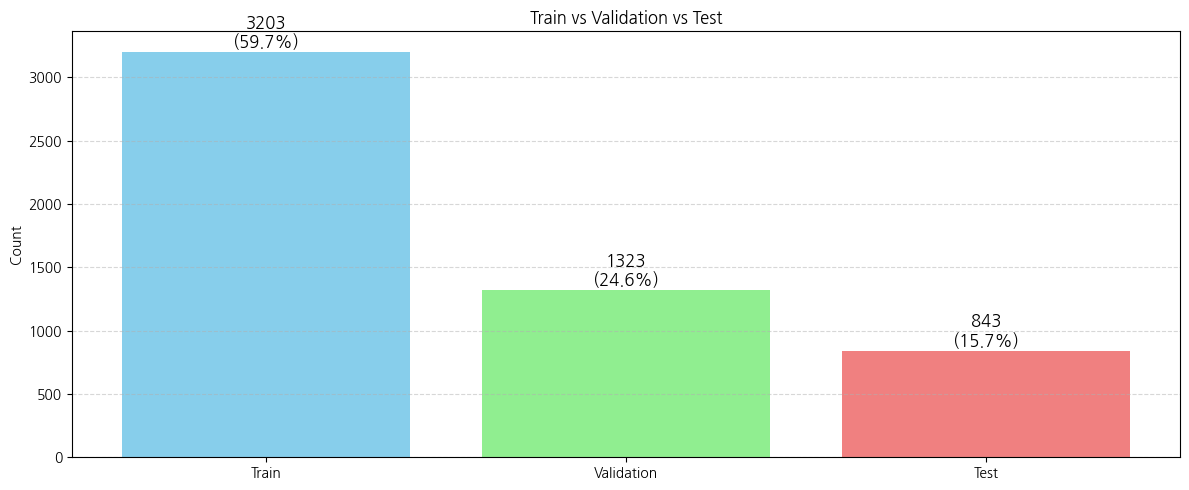

In [185]:
def plot_train_val_test(df):
    import matplotlib.pyplot as plt

    counts = {
        'Train': df['Train'].sum(),
        'Validation': (len(df) - df['Test'].sum()) - df['Train'].sum(),
        'Test': df['Test'].sum(),
    }

    total = counts['Train'] + counts['Validation'] + counts['Test']
    labels = ['Train', 'Validation', 'Test']
    values = [counts['Train'], counts['Validation'], counts['Test']]
    colors = ['skyblue', 'lightgreen', 'lightcoral']

    plt.figure(figsize=(12, 5))
    bars = plt.bar(labels, values, color=colors)

    # 막대 위에 개수 및 % 표시
    for bar, value in zip(bars, values):
        percent = value / total * 100 if total > 0 else 0
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
                 f'{value}\n({percent:.1f}%)',
                 ha='center', va='bottom', fontsize=12, fontweight='bold')

    plt.title('Train vs Validation vs Test')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

df = df_train_val_test.copy()
plot_train_val_test(df)

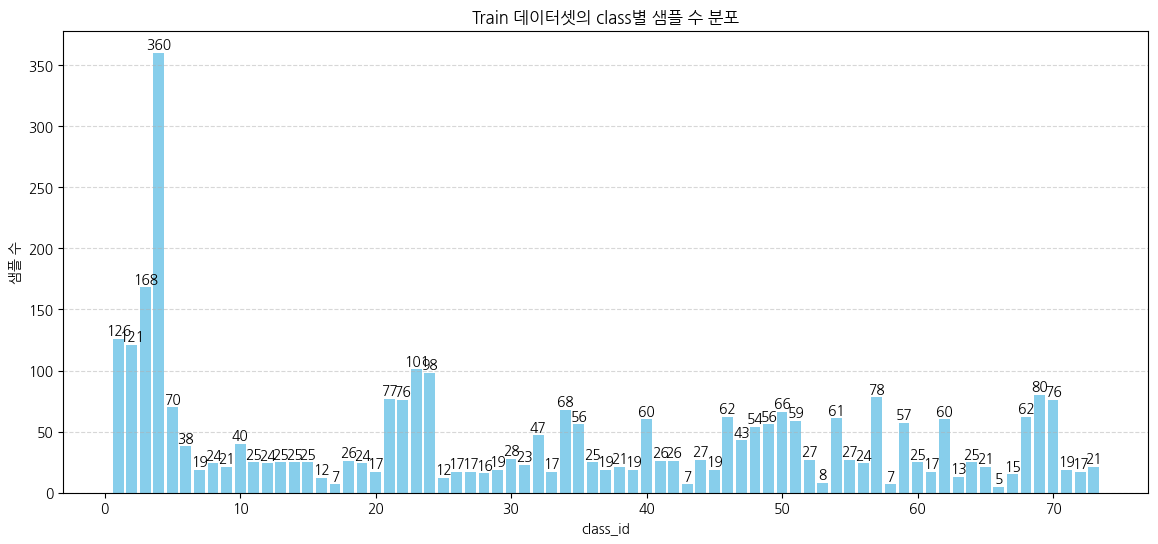

In [186]:
def plot_train_class_distribution(df):
    import matplotlib.pyplot as plt

    # Train만 필터링
    df_train = df[df['set_type'] == 'Train']
    class_counts = df_train['class_id'].value_counts().sort_index()

    plt.figure(figsize=(14, 6))
    bars = plt.bar(class_counts.index, class_counts.values, color='skyblue')

    # 각 막대 위에 개수 표시
    for bar, value in zip(bars, class_counts.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 f'{value}', ha='center', va='bottom', fontsize=10)

    plt.title('Train 데이터셋의 class별 샘플 수 분포')
    plt.xlabel('class_id')
    plt.ylabel('샘플 수')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
plot_train_class_distribution(df)    

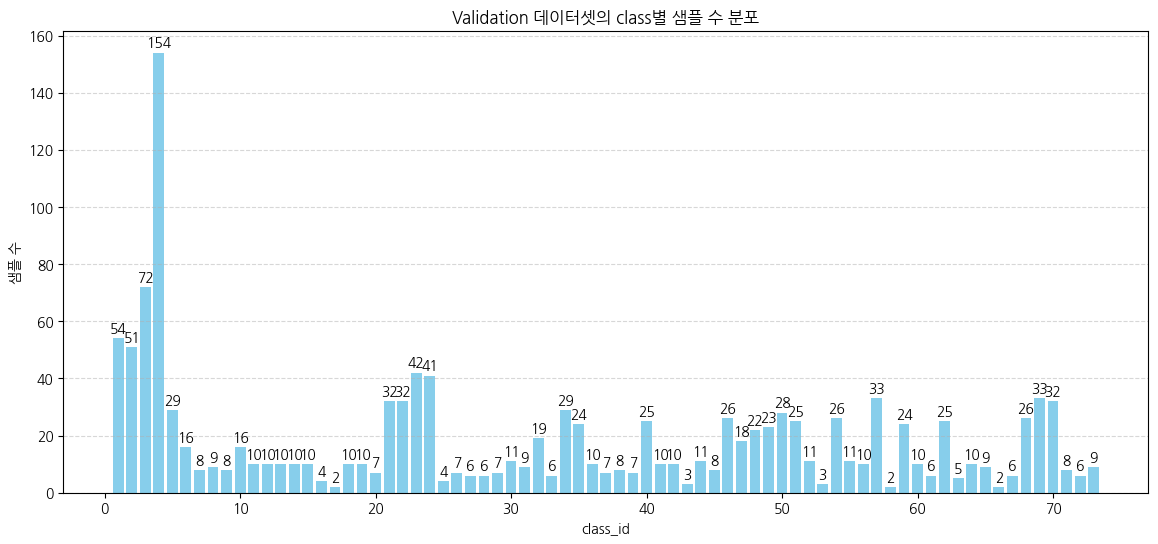

In [187]:
def plot_validation_class_distribution(df):
    import matplotlib.pyplot as plt

    # Validation만 필터링
    df_val = df[df['set_type'] == 'Validation']
    class_counts = df_val['class_id'].value_counts().sort_index()

    plt.figure(figsize=(14, 6))
    bars = plt.bar(class_counts.index, class_counts.values, color='skyblue')

    # 각 막대 위에 개수 표시
    for bar, value in zip(bars, class_counts.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 f'{value}', ha='center', va='bottom', fontsize=10)

    plt.title('Validation 데이터셋의 class별 샘플 수 분포')
    plt.xlabel('class_id')
    plt.ylabel('샘플 수')
    plt.grid(axis='y', linestyle='--', alpha=0.5)

plot_validation_class_distribution(df)    

drug_N별 샘플 갯수 상위 10개:
인덱스    count  
index     count  
K-003483  514    
K-003351  240    
K-001900  180    
K-002483  172    
K-016548  143    
drug_N
K-027993    11
K-023203    10
K-012420     9
K-029871     9
K-033878     7
Name: count, dtype: int64


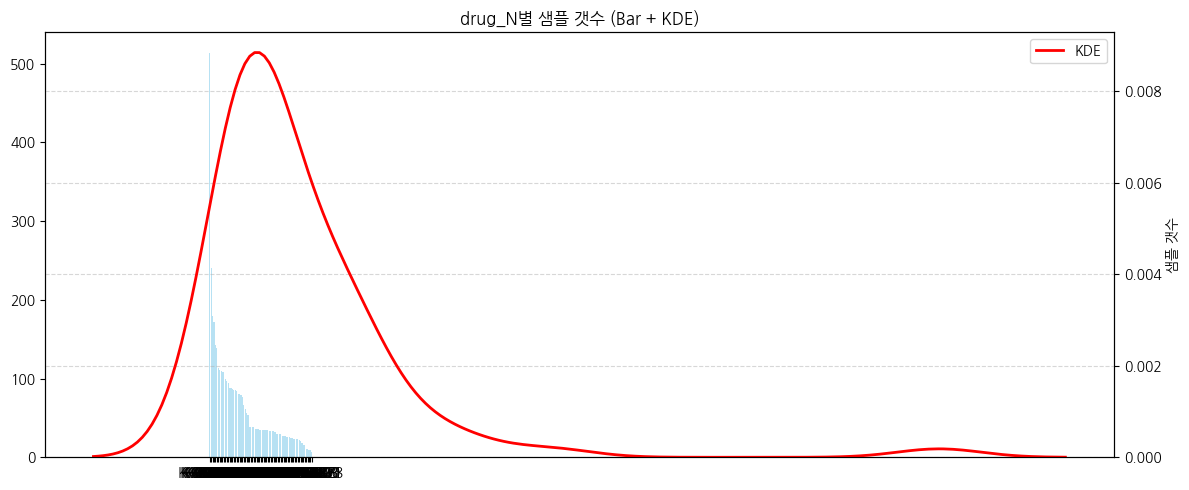

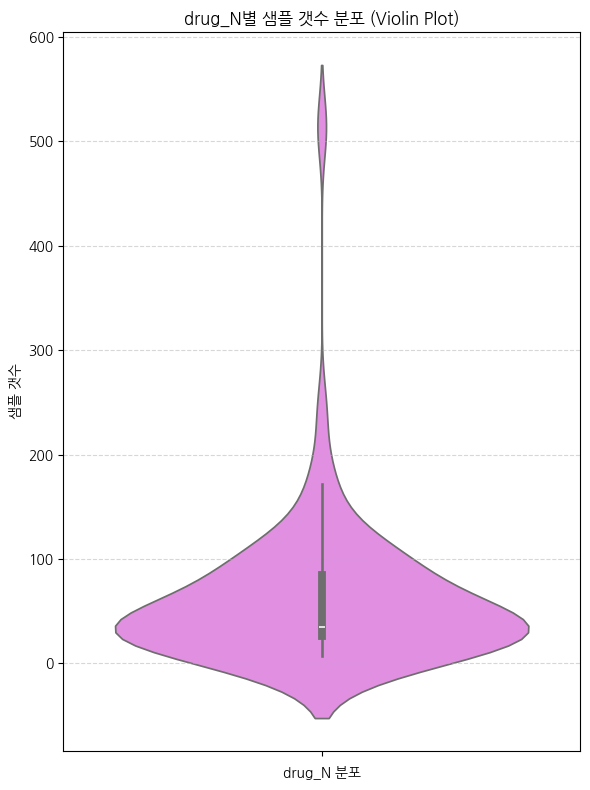

In [188]:
# drug_N별 데이터 분포도(샘플 갯수) 살펴보기
def plot_dfrug_distribution(df):
    # drug_N별 샘플 갯수 집계
    drug_counts = df['drug_N'].value_counts().sort_values(ascending=False)

    print("drug_N별 샘플 갯수 상위 10개:")
    drug_counts.head_att(5)
    print(drug_counts.tail(5))

    plt.figure(figsize=(12,5))
    # 막대그래프
    plt.bar(drug_counts.index, drug_counts.values, width=0.8, color='skyblue', alpha=0.6, label='Bar')
    # KDE 곡선 (x축은 drug_N별 샘플 갯수)
    ax2 = plt.gca().twinx()
    sns.kdeplot(drug_counts.values, color='red', linewidth=2, ax=ax2, label='KDE')
    ax2.set_ylabel('밀도')
    ax2.grid(axis='y', linestyle='--', alpha=0.5)  # 가로 그리드 라인 추가
    plt.title('drug_N별 샘플 갯수 (Bar + KDE)')
    plt.xlabel('drug_N')
    plt.ylabel('샘플 갯수')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

plot_dfrug_distribution(df)

def plot_dfrug_distribution_violin(df):
    import matplotlib.pyplot as plt
    import seaborn as sns

    # drug_N별 샘플 갯수 집계
    drug_counts = df['drug_N'].value_counts()

    plt.figure(figsize=(6,8))
    ax = sns.violinplot(y=drug_counts.values, color='violet')
    ax.set_title('drug_N별 샘플 갯수 분포 (Violin Plot)')
    ax.set_ylabel('샘플 갯수')
    ax.set_xlabel('drug_N 분포')
    ax.grid(axis='y', linestyle='--', alpha=0.5)  # 가로 그리드 라인 추가
    plt.tight_layout()
    plt.show()

plot_dfrug_distribution_violin(df)


In [189]:
"""
                                              filename  ext                                             file_name                                                                                                                                                                             path                         label    drug0    drug1    drug2    drug3 Train  Test   drug_N width height bbox_x bbox_y bbox_w bbox_h yolo_x yolo_y yolo_w yolo_h class_id   set_type
  872 K-001900-016548-018110-027926_0_2_0_2_75_000_200 json K-001900-016548-018110-027926_0_2_0_2_75_000_200.json d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip\train_annotations\K-001900-016548-018110-027926_json\K-001900\K-001900-016548-018110-027926_0_2_0_2_75_000_200.json K-001900-016548-018110-027926 K-001900 K-016548 K-018110 K-027926 False False K-001900   976   1280    142    241    200    127  0.248 0.2379 0.2049 0.0992        1 Validation
  870 K-001900-016548-018110-027926_0_2_0_2_70_000_200 json K-001900-016548-018110-027926_0_2_0_2_70_000_200.json d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip\train_annotations\K-001900-016548-018110-027926_json\K-001900\K-001900-016548-018110-027926_0_2_0_2_70_000_200.json K-001900-016548-018110-027926 K-001900 K-016548 K-018110 K-027926 False False K-001900   976   1280    630    894    211    133 0.7536 0.7504 0.2162 0.1039        1 Validation
  867 K-001900-016548-018110-021026_0_2_0_2_90_000_200 json K-001900-016548-018110-021026_0_2_0_2_90_000_200.json d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip\train_annotations\K-001900-016548-018110-021026_json\K-001900\K-001900-016548-018110-021026_0_2_0_2_90_000_200.json K-001900-016548-018110-021026 K-001900 K-016548 K-018110 K-021026  True False K-001900   976   1280    621    887    208    143 0.7428 0.7488 0.2131 0.1117        1      Train
  862 K-001900-016548-018110-021026_0_2_0_2_75_000_200 json K-001900-016548-018110-021026_0_2_0_2_75_000_200.json d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip\train_annotations\K-001900-016548-018110-021026_json\K-001900\K-001900-016548-018110-021026_0_2_0_2_75_000_200.json K-001900-016548-018110-021026 K-001900 K-016548 K-018110 K-021026  True False K-001900   976   1280    596    854    212    148 0.7193  0.725 0.2172 0.1156        1      Train
  859 K-001900-016548-018110-021026_0_2_0_2_70_000_200 json K-001900-016548-018110-021026_0_2_0_2_70_000_200.json d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip\train_annotations\K-001900-016548-018110-021026_json\K-001900\K-001900-016548-018110-021026_0_2_0_2_70_000_200.json K-001900-016548-018110-021026 K-001900 K-016548 K-018110 K-021026 False False K-001900   976   1280    173    279    201    141 0.2802  0.273 0.2059 0.1102        1 Validation
 1473 K-001900-016551-029345-033208_0_2_0_2_70_000_200 json K-001900-016551-029345-033208_0_2_0_2_70_000_200.json d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip\train_annotations\K-001900-016551-029345-033208_json\K-001900\K-001900-016551-029345-033208_0_2_0_2_70_000_200.json K-001900-016551-029345-033208 K-001900 K-016551 K-029345 K-033208  True False K-001900   976   1280    687    807    132    207 0.7715 0.7113 0.1352 0.1617        1      Train
 1468 K-001900-016551-027926-044199_0_2_0_2_90_000_200 json K-001900-016551-027926-044199_0_2_0_2_90_000_200.json d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip\train_annotations\K-001900-016551-027926-044199_json\K-001900\K-001900-016551-027926-044199_0_2_0_2_90_000_200.json K-001900-016551-027926-044199 K-001900 K-016551 K-027926 K-044199  True False K-001900   976   1280    156    248    202    128 0.2633 0.2437  0.207    0.1        1      Train
 1493 K-001900-016551-029451-033208_0_2_0_2_70_000_200 json K-001900-016551-029451-033208_0_2_0_2_70_000_200.json d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip\train_annotations\K-001900-016551-029451-033208_json\K-001900\K-001900-016551-029451-033208_0_2_0_2_70_000_200.json K-001900-016551-029451-033208 K-001900 K-016551 K-029451 K-033208  True False K-001900   976   1280    643    845    189    190 0.7556 0.7344 0.1936 0.1484        1      Train
 1492 K-001900-016551-029345-044199_0_2_0_2_90_000_200 json K-001900-016551-029345-044199_0_2_0_2_90_000_200.json d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip\train_annotations\K-001900-016551-029345-044199_json\K-001900\K-001900-016551-029345-044199_0_2_0_2_90_000_200.json K-001900-016551-029345-044199 K-001900 K-016551 K-029345 K-044199  True False K-001900   976   1280    179    268    131    201 0.2505 0.2879 0.1342  0.157        1      Train
 1485 K-001900-016551-029345-044199_0_2_0_2_70_000_200 json K-001900-016551-029345-044199_0_2_0_2_70_000_200.json d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip\train_annotations\K-001900-016551-029345-044199_json\K-001900\K-001900-016551-029345-044199_0_2_0_2_70_000_200.json K-001900-016551-029345-044199 K-001900 K-016551 K-029345 K-044199 False False K-001900   976   1280    688    806    129    208  0.771 0.7109 0.1322 0.1625        1 Validation
"""

'\n                                              filename  ext                                             file_name                                                                                                                                                                             path                         label    drug0    drug1    drug2    drug3 Train  Test   drug_N width height bbox_x bbox_y bbox_w bbox_h yolo_x yolo_y yolo_w yolo_h class_id   set_type\n  872 K-001900-016548-018110-027926_0_2_0_2_75_000_200 json K-001900-016548-018110-027926_0_2_0_2_75_000_200.json d:\\dataset\\kaggle_code_it_data\x07i04-level1-project.zip.unzip\train_annotations\\K-001900-016548-018110-027926_json\\K-001900\\K-001900-016548-018110-027926_0_2_0_2_75_000_200.json K-001900-016548-018110-027926 K-001900 K-016548 K-018110 K-027926 False False K-001900   976   1280    142    241    200    127  0.248 0.2379 0.2049 0.0992        1 Validation\n  870 K-001900-016548-018110-027926_0_2_0_2_70_000_200

In [190]:
def create_yolo_dataset(df, yolo_dataset_path):
    """
                                              filename  ext                                             file_name                                                                                                                                                                             path                         label    drug0    drug1    drug2    drug3 Train  Test   drug_N width height bbox_x bbox_y bbox_w bbox_h yolo_x yolo_y yolo_w yolo_h class_id   set_type
  872 K-001900-016548-018110-027926_0_2_0_2_75_000_200 json K-001900-016548-018110-027926_0_2_0_2_75_000_200.json d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip\train_annotations\K-001900-016548-018110-027926_json\K-001900\K-001900-016548-018110-027926_0_2_0_2_75_000_200.json K-001900-016548-018110-027926 K-001900 K-016548 K-018110 K-027926 False False K-001900   976   1280    142    241    200    127  0.248 0.2379 0.2049 0.0992        1 Validation
  870 K-001900-016548-018110-027926_0_2_0_2_70_000_200 json K-001900-016548-018110-027926_0_2_0_2_70_000_200.json d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip\train_annotations\K-001900-016548-018110-027926_json\K-001900\K-001900-016548-018110-027926_0_2_0_2_70_000_200.json K-001900-016548-018110-027926 K-001900 K-016548 K-018110 K-027926 False False K-001900   976   1280    630    894    211    133 0.7536 0.7504 0.2162 0.1039        1 Validation
 
dataset/
├── images/
│   ├── train/
│   │   ├── image1.jpg
│   │   ├── image2.jpg
│   │   └── ...
│   ├── val/
│   │   ├── val_image1.jpg
│   │   └── ...
│   └── test/ (선택적)
└── labels/
    ├── train/
    │   ├── image1.txt
    │   ├── image2.txt
    │   └── ...
    ├── val/
    │   ├── val_image1.txt
    │   └── ...
    └── test/ (선택적)

    DataFrame df_convert_yolo를 만들고 df를 복사하고 to yolo_image_train, yolo_image_val, yolo_label_train, yolo_label_val를 만든다.
    df의 Train 컬럼을 참고 하면 된다.
    df_convert_yolo를 yolo_dataset_path에 저장한다. (원복등에 참고 할 수 있을 것이다.)

    만들어진 df_convert_yolo 를 이용하여 images를 yolo_image_train, yolo_image_val에 이동시킨다.
    전체적인 데이타 용량이 큼으로 파일을 이동시키는 방식으로 한다.

    """

    images_train_dir = os.path.join(yolo_dataset_path, 'images', 'train')
    images_val_dir = os.path.join(yolo_dataset_path, 'images', 'val')
    images_test_dir = os.path.join(yolo_dataset_path, 'images', 'test')
    labels_train_dir = os.path.join(yolo_dataset_path, 'labels', 'train')
    labels_val_dir = os.path.join(yolo_dataset_path, 'labels', 'val')
    labels_test_dir = os.path.join(yolo_dataset_path, 'labels', 'test')
    for d in [images_train_dir, images_val_dir, images_test_dir, labels_train_dir, labels_val_dir, labels_test_dir]:
        os.makedirs(d, exist_ok=True)

    df.sort_values('filename', inplace=True)
    df = df.reset_index(drop=True)
    
    # filename별 등장 횟수 카운트용 dict
    label_name_count = {}
    
    pbar = tqdm(df.iterrows(), total=len(df), mininterval=3, desc="Creating YOLO dataset")
    for idx, row in pbar:
        set_type = row.get('set_type', 'Unknown')
        img_dst, label_dst = None, None
        
        filename = row['filename']
        label_name = row['label']
        # 등장 횟수 카운트
        count = label_name_count.get(label_name, 0)
        label_name_count[label_name] = count + 1

        # 파일명에 _순서 붙이기
        base_img_name = f"{label_name}_{count}.png"
        base_label_name = f"{label_name}_{count}.txt"

        if set_type == 'Train':
            img_dst = os.path.join(images_train_dir, base_img_name)
            label_dst = os.path.join(labels_train_dir, base_label_name)
        elif set_type == 'Validation':
            img_dst = os.path.join(images_val_dir, base_img_name)
            label_dst = os.path.join(labels_val_dir, base_label_name)
        elif set_type == 'Test':
            img_dst = os.path.join(images_test_dir, base_img_name)
            label_dst = os.path.join(labels_test_dir, base_label_name)
        else:
            continue

        df.loc[idx, 'yolo_image'] = img_dst
        df.loc[idx, 'yolo_label'] = label_dst

        if idx % 100 == 0:
            pbar.set_postfix_str(base_img_name)

    return df

def create_yolo_df(ignore=True):
    df = df_train_val_test.copy()
    yolo_path  = os.path.join(root_dir, "yolo")
    df_yolo = helper.pd_checkout("df_codeit04_yolo", commit_dir=drive_root())
    if df_yolo.empty | ignore:
        df_yolo = create_yolo_dataset(df, yolo_path)
        helper.pd_commit(df_yolo, "df_codeit04_yolo", commit_dir=drive_root())
    else:
        print("df_yolo 로드됨")
    return df_yolo, yolo_path
df_yolo, yolo_path = create_yolo_df(ignore=True)

Creating YOLO dataset: 100%|██████████| 5369/5369 [00:04<00:00, 1127.82it/s, K-003544-010221-016551-021026_6.png]


✅ 커밋 완료: d2892c3ce0cf | 2025-09-11 15:15:25 | df_codeit04_yolo


In [191]:
print(df_yolo.shape)
df_yolo.describe().head_att(10)
df_yolo.iloc[2000:2002].head_att(2)


(5369, 27)
          width   height   bbox_x   bbox_y   bbox_w   bbox_h yolo_x yolo_y yolo_w yolo_h class_id
 count     5369     5369     5369     5369     5369     5369   5369   5369   5369   5369     4526
  mean 822.7558 1079.024 300.7608 408.1058 218.6091 243.4092 0.4201 0.4139  0.224 0.1902  30.6418
   std 355.1141 465.7234 268.9921 349.6591 114.1805 150.2238 0.2985  0.292  0.117 0.1174  23.2135
   min        0        0        0        0        0        0      0      0      0      0        1
   25%      976     1280       85      123      187      182 0.2305 0.2289 0.1916 0.1422        5
   50%      976     1280      153      262      227      220 0.2879 0.2969 0.2326 0.1719       28
   75%      976     1280      585      770      281      341 0.7326 0.7129 0.2879 0.2664       51
   max      976     1280     6567     8889      529      669 6.8878 7.0293  0.542 0.5227       73
                                              filename  ext                                             fil

### 5. Image to Yolo File
- resize Iamge 640 x 480

In [234]:
def create_individual_object_masks(img, bboxes, corner_radius=20):
    """
    각 객체별로 개별 마스크를 생성
    
    Args:
        img: 원본 이미지
        bboxes: 객체들의 bbox 리스트 [(x, y, w, h), ...]
        corner_radius: 둥근 모서리 반지름
    
    Returns:
        object_masks: 각 객체의 마스크 리스트
        combined_mask: 모든 객체를 합친 마스크
    """
    h, w = img.shape[:2]
    object_masks = []
    combined_mask = np.zeros((h, w), dtype=np.uint8)
    
    for bbox in bboxes:
        x, y, bbox_w, bbox_h = map(int, bbox)
        
        # 안전 체크
        if (x + bbox_w <= w and y + bbox_h <= h and 
            x >= 0 and y >= 0 and bbox_w > 0 and bbox_h > 0):
            
            # 개별 객체 마스크 생성
            object_mask = np.zeros((h, w), dtype=np.uint8)
            
            # 둥근 모서리 마스크 생성
            rounded_mask = create_rounded_mask(bbox_w, bbox_h, corner_radius)
            
            # 해당 위치에 마스크 적용
            object_mask[y:y+bbox_h, x:x+bbox_w] = rounded_mask
            
            object_masks.append(object_mask)
            
            # 전체 마스크에 추가 (OR 연산)
            combined_mask = cv2.bitwise_or(combined_mask, object_mask)
    
    return object_masks, combined_mask

def create_cleaned_image_with_individual_objects(img, bboxes, bg_color, corner_radius=20):
    """
    개별 객체들만 유지하고 나머지는 배경색으로 채운 이미지 생성
    
    Args:
        img: 원본 이미지
        bboxes: 라벨링된 객체들의 bbox 리스트 [(x, y, w, h), ...]
        bg_color: 배경색
        corner_radius: 둥근 모서리 반지름
    
    Returns:
        cleaned_img: 정리된 이미지 (라벨링된 객체만 유지)
    """
    h, w = img.shape[:2]
    
    # 배경색으로 채운 캔버스 생성
    cleaned_img = np.full_like(img, bg_color)
    
    if not bboxes:
        return cleaned_img
    
    # 각 객체별 마스크 생성
    object_masks, combined_mask = create_individual_object_masks(img, bboxes, corner_radius)
    
    # 각 객체를 개별적으로 복사
    for bbox, object_mask in zip(bboxes, object_masks):
        x, y, bbox_w, bbox_h = map(int, bbox)
        
        # 안전 체크
        if (x + bbox_w <= w and y + bbox_h <= h and 
            x >= 0 and y >= 0 and bbox_w > 0 and bbox_h > 0):
            
            # 해당 영역의 마스크와 원본 이미지를 이용해 객체만 추출
            roi_mask = object_mask[y:y+bbox_h, x:x+bbox_w]
            roi_img = img[y:y+bbox_h, x:x+bbox_w]
            roi_bg = np.full_like(roi_img, bg_color)
            
            # 마스크 적용 (객체 부분만 원본, 나머지는 배경색)
            mask_3ch = cv2.cvtColor(roi_mask, cv2.COLOR_GRAY2BGR) / 255.0
            blended_roi = (roi_img * mask_3ch + roi_bg * (1 - mask_3ch)).astype(np.uint8)
            
            # 정리된 이미지에 복사
            cleaned_img[y:y+bbox_h, x:x+bbox_w] = blended_roi
    
    return cleaned_img

def extract_background_color_from_unlabeled_areas(img, bboxes, corner_radius=20, sample_size=1000):
    """
    라벨링된 객체들을 제외한 영역에서 배경색 추출
    
    Args:
        img: 원본 이미지
        bboxes: 라벨링된 객체들의 bbox 리스트
        corner_radius: 둥근 모서리 반지름
        sample_size: 배경색 추출을 위한 샘플 픽셀 수
    
    Returns:
        bg_color: 배경색 (B, G, R)
    """
    h, w = img.shape[:2]
    
    if not bboxes:
        # bbox가 없으면 전체 이미지에서 평균 추출
        return np.mean(img.reshape(-1, 3), axis=0).astype(np.uint8)
    
    # 라벨링된 객체들의 마스크 생성
    _, combined_mask = create_individual_object_masks(img, bboxes, corner_radius)
    
    # 배경 마스크 (라벨링된 객체가 아닌 영역)
    background_mask = cv2.bitwise_not(combined_mask)
    
    # 배경 영역 픽셀 추출
    background_pixels = img[background_mask == 255]
    
    if len(background_pixels) == 0:
        # 배경이 없으면 ImageNet 평균값 사용
        return np.array([123, 117, 104], dtype=np.uint8)
    
    # 너무 많은 픽셀이 있으면 랜덤 샘플링
    if len(background_pixels) > sample_size:
        indices = np.random.choice(len(background_pixels), sample_size, replace=False)
        background_pixels = background_pixels[indices]
    
    # K-means를 사용해 주요 색상 추출
    try:
        kmeans = KMeans(n_clusters=min(3, len(background_pixels)), random_state=42, n_init=10)
        kmeans.fit(background_pixels)
        
        # 가장 많은 픽셀을 가진 클러스터의 중심색을 배경색으로 선택
        labels = kmeans.labels_
        cluster_counts = np.bincount(labels)
        dominant_cluster = np.argmax(cluster_counts)
        bg_color = kmeans.cluster_centers_[dominant_cluster].astype(np.uint8)
        
    except:
        # K-means 실패시 평균값 사용
        bg_color = np.mean(background_pixels, axis=0).astype(np.uint8)
    
    return bg_color

def create_yolo_file(df_yolo, yolo_dataset_path, image_size=(640, 480), 
                    object_margin=30, corner_radius=100, ignore=False, no_label_erase=False):
    """
    개선된 YOLO 데이터셋 생성 함수
    
    Args:
        df_yolo: YOLO 데이터프레임
        yolo_dataset_path: 저장 경로
        image_size: 목표 이미지 크기
        object_margin: 객체 주변 마진 (no_label_erase=True일 때는 사용안함)
        corner_radius: 둥근 모서리 반지름
        ignore: 기존 파일 무시 여부
        no_label_erase: True이면 라벨링되지 않은 객체 제거, False이면 기존 로직
    """
    df_yolo = df_yolo.sort_values('imgfile').reset_index(drop=True)
    
    # filename별로 그룹화 (같은 이미지의 여러 객체 처리)
    filename_groups = {}
    for idx, row in df_yolo.iterrows():
        filename = row['filename']
        if filename not in filename_groups:
            filename_groups[filename] = []
        filename_groups[filename].append(row)
    
    processed_images = {}  # 이미지 처리 결과 캐시
    
    pbar = tqdm(df_yolo.iterrows(), total=len(df_yolo), mininterval=3, 
                desc=f"Creating {'label-only' if no_label_erase else 'enhanced'} YOLO dataset")
    
    for idx, row in pbar:
        src_img_path = row['imgfile']
        dest_img_path = row['yolo_image']
        dest_label_path = row['yolo_label']
        filename = row['filename']
        
        str_end = os.path.basename(dest_img_path)
        
        # 이미지 처리
        if ignore or not os.path.exists(dest_img_path):
            try:
                dest_img_dir = os.path.dirname(dest_img_path)
                os.makedirs(dest_img_dir, exist_ok=True)
                
                if os.path.exists(src_img_path):
                    # 캐시된 결과가 있으면 재사용
                    cache_key = f"{src_img_path}_{no_label_erase}"
                    if cache_key in processed_images:
                        final_img = processed_images[cache_key]
                    else:
                        # 원본 이미지 로드
                        img = cv2.imread(src_img_path)
                        if img is None:
                            print(f"이미지 로드 실패: {src_img_path}")
                            continue
                        
                        # 같은 이미지의 모든 bbox 수집
                        same_filename_rows = filename_groups.get(filename, [row])
                        bboxes = []
                        for same_row in same_filename_rows:
                            if (same_row['bbox_w'] > 0 and same_row['bbox_h'] > 0 and 
                                not pd.isna(same_row['bbox_x'])):
                                bboxes.append([
                                    same_row['bbox_x'], same_row['bbox_y'],
                                    same_row['bbox_w'], same_row['bbox_h']
                                ])
                        
                        if no_label_erase:
                            # === 새로운 로직: 라벨링된 객체만 유지 ===
                            
                            # 1. 라벨링되지 않은 영역에서 배경색 추출
                            bg_color = extract_background_color_from_unlabeled_areas(
                                img, bboxes, corner_radius
                            )
                            
                            # 2. 라벨링된 객체만 유지하고 나머지는 배경색으로 채움
                            cleaned_img = create_cleaned_image_with_individual_objects(
                                img, bboxes, bg_color, corner_radius
                            )
                            
                        else:
                            # === 기존 로직: 객체 영역을 큰 박스로 처리 ===
                            
                            # 1. 여러 객체의 rect를 합치고 마진 추가
                            combined_rect = get_combined_rect_with_margin(
                                bboxes, img.shape, object_margin
                            )
                            
                            # 2. 둥근 모서리로 잘라낸 영역을 제외한 배경색 추출
                            bg_color = extract_background_color_advanced(
                                img, combined_rect, corner_radius
                            )
                            
                            # 3. 둥근 모서리 적용된 정리된 이미지 생성
                            cleaned_img = create_cleaned_image_with_rounded_crop(
                                img, combined_rect, bg_color, corner_radius
                            )
                        
                        # 4. 비율 유지 리사이즈 및 배경색 패딩
                        final_img = resize_with_aspect_ratio_and_bg_advanced(
                            cleaned_img, image_size, bg_color
                        )
                        
                        # 결과 캐싱
                        processed_images[cache_key] = final_img
                    
                    # 이미지 저장
                    cv2.imwrite(dest_img_path, final_img)
                    
            except Exception as e:
                print(f"이미지 처리 오류: {src_img_path} -> {dest_img_path}, {e}")
                continue
        else:
            str_end += " (이미 존재)"
        
        # YOLO 라벨 파일 생성
        try:
            if ignore or not os.path.exists(dest_label_path):
                dest_label_dir = os.path.dirname(dest_label_path)
                os.makedirs(dest_label_dir, exist_ok=True)
                
                with open(dest_label_path, 'w', encoding='utf-8') as f:
                    # class_id가 0이면 에러 (YOLO에서 0은 첫 번째 클래스)
                    class_id = max(0, int(row['class_id']) - 1) if row['class_id'] > 0 else 0
                    f.write(f"{class_id} {row['yolo_x']:.6f} {row['yolo_y']:.6f} "
                           f"{row['yolo_w']:.6f} {row['yolo_h']:.6f}\n")
                    
        except Exception as e:
            print(f"라벨 저장 오류: {dest_label_path}, {e}")
        
        if idx % 100 == 0:
            pbar.set_postfix_str(str_end)
    
    # dataset.yaml 파일 생성
    df_drug_sort = df_drug.sort_values(by='class_id')
    classnames = df_drug_sort['drug_N'].tolist()
    
    dataset_config = {
        'path': yolo_dataset_path,
        'train': 'images/train',
        'val': 'images/val', 
        'test': 'images/test',
        'nc': len(classnames),
        'names': classnames
    }
    
    yaml_path = os.path.join(yolo_dataset_path, "dataset.yaml")
    with open(yaml_path, 'w') as f:
        yaml.dump(dataset_config, f, default_flow_style=False)
    
    print(f"\n=== 처리 완료 ===")
    print(f"처리 모드: {'라벨링된 객체만 유지' if no_label_erase else '기존 방식 (큰 박스 처리)'}")
    print(f"처리된 이미지 수: {len(set(k.split('_')[0] for k in processed_images.keys()))}")
    print(f"생성된 라벨 수: {len(df_yolo)}")
    print(f"YAML 파일: {yaml_path}")
    
    return yaml_path

In [235]:
# 테스트 100 개만
df_yolo_test = df_yolo.iloc[2000:2100].copy()
# 실행

## 기존 방식 (큰 박스로 처리)
#yaml_path = create_yolo_file(df_yolo_test, yolo_path, no_label_erase=False, ignore=True)

# 새로운 방식 (라벨링된 객체만 유지)
yaml_path = create_yolo_file(df_yolo_test, yolo_path, no_label_erase=True, ignore=True)

Creating label-only YOLO dataset: 100%|██████████| 100/100 [00:07<00:00, 12.73it/s, K-002483-005094-013395-019552_0.png]


=== 처리 완료 ===
처리 모드: 라벨링된 객체만 유지
처리된 이미지 수: 1
생성된 라벨 수: 100
YAML 파일: d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip\yolo\dataset.yaml


In [ ]:
raise ValueError("stop")